In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
%%time
Porb = 365.25/20**1.5 # innermost plant at approx 0.05 AU (0.04-0.06)
tinst = []
for root, dirs, files in os.walk('Eh/'):
    for direc in dirs:
        if direc[:3] == 'sim':
            with open("Eh/{0}/info.out".format(direc), 'rb') as f:
                times = []
                for line in f.readlines():
                    if "was hit by" in line.decode():
                        times.append(float(line.split()[-2].decode())/Porb)
                tinst += [times[i+1]-times[i] for i in range(len(times)-1)]
            
tinst = np.array(tinst)

CPU times: user 130 ms, sys: 310 ms, total: 440 ms
Wall time: 3.79 s


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


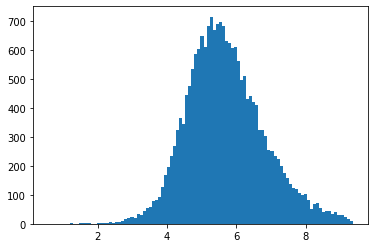

In [3]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(np.log10(tinst), bins=100)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


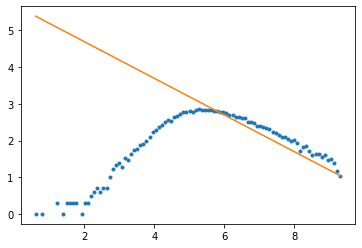

In [4]:
delta = bins[1]-bins[0]
centers = (bins+delta/2)[:-1]

fig, ax = plt.subplots()
ax.plot(centers, np.log10(counts), '.')
ax.plot(centers, np.log10(counts)[-1] - 0.5*(centers-centers[-1]))

(0, 1000)

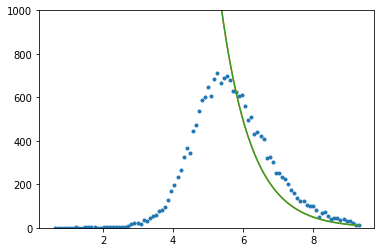

In [5]:
delta = bins[1]-bins[0]
centers = (bins+delta/2)[:-1]

fig, ax = plt.subplots()
ax.plot(centers, counts, '.')
ax.plot(centers, counts[-1]*(10**centers/10**centers[-1])**(-0.5))
ax.plot(centers, counts[-1]*np.exp(-0.5*np.log(10)*(centers-centers[-1])))
ax.set_ylim([0,1000])

In [6]:
Lmin = 1
Lmax=10**15
Ls = np.logspace(np.log10(Lmin), np.log10(Lmax), 1000)
pdf = Ls**-0.5

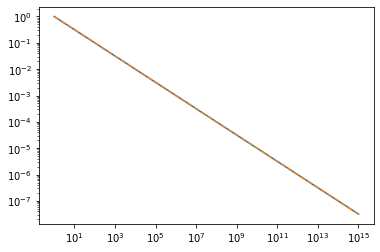

In [7]:
%matplotlib inline
fig, ax = plt.subplots()
ax.loglog(Ls, pdf)
ax.loglog(Ls, Ls[0]*(Ls/Ls[0])**(-0.5), '--')

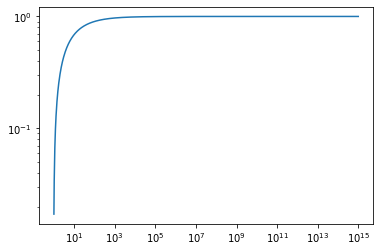

In [8]:
cumpdf = np.cumsum(pdf)/pdf.sum()
fig, ax = plt.subplots()
ax.loglog(Ls, cumpdf)

In [9]:
def draw(Lmin, Lmax, alpha=0.5):
    Npts = 1000
    Ls = np.logspace(np.log10(Lmin), np.log10(Lmax), Npts)
    pdf = Ls**(-alpha) # dN/dlogL \propto L**-alpha
    cumpdf = np.cumsum(pdf)/pdf.sum()
    randv = np.random.uniform()
    idx = np.searchsorted(cumpdf, randv)
    return Ls[idx]

In [49]:
%%time
Ls = []
Nsamples = 1000000
Lmin = 1e5
Lmax = 1e15
alpha=0.01
for i in range(Nsamples):
    Ls.append(draw(Lmin, Lmax, alpha))

KeyboardInterrupt: 

<BarContainer object of 200 artists>

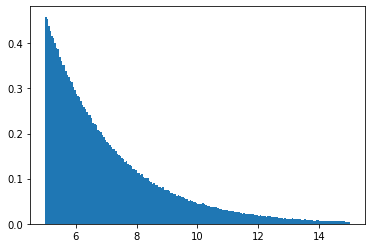

In [11]:
fig, ax = plt.subplots()
delta=0.05
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins = np.histogram(np.log10(Ls), bins=np.linspace(np.log10(Lmin),np.log10(Lmax),int(span/delta+1)), density=True)
centers = (bins+delta/2)[:-1]
ax.bar(centers, counts, width=delta)

In [12]:
Pdraw = counts*delta
Pdraw.sum()

1.0

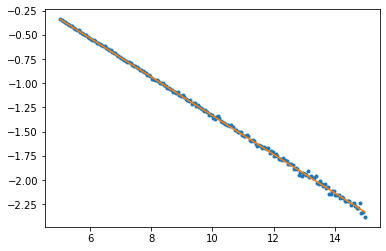

In [13]:
fig, ax = plt.subplots()
ax.plot(centers, np.log10(counts), '.')
ax.plot(centers, np.log10(counts)[0] - alpha*(centers-centers[0]))

In [14]:
def run(seed, age, Lmin=1e5, Lmax=1e12, alpha=0.5):
    np.random.seed(seed)
    ts = []
    t=0
    while t<age:
        tinst = draw(Lmin, Lmax, alpha=alpha)
        t += tinst
        ts.append(t)
    return ts, t-age # t = next instability, t-age = remaining lifetime at tobs = age

In [67]:
%%time
age = 1e10
Nsamples=10000
tlefts=[]
ts=[]
alpha=0.2
Lmax=1e15
for i in range(Nsamples):
    samplets, tleft = run(i, age, Lmin, Lmax, alpha = alpha)
    tlefts.append(tleft)
    ts += samplets

CPU times: user 8.74 s, sys: 8.79 ms, total: 8.75 s
Wall time: 8.76 s


<BarContainer object of 35 artists>

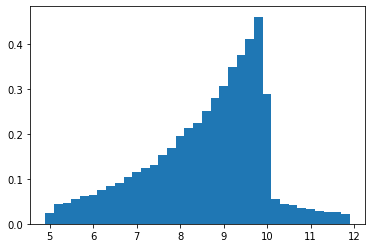

In [68]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
counts, bins = np.histogram(np.log10(ts), bins=bins, density=True)
ax.bar(centers, counts, width=delta)
#ax.plot(centers, 330*np.exp(-(centers-10)**2/2.5))
#mid = int(len(bins)/2)
#ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
#ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

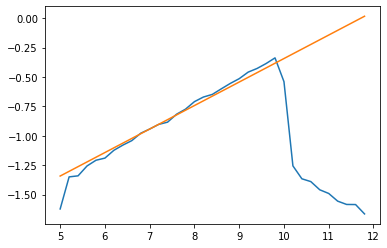

In [69]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
counts, bins = np.histogram(np.log10(ts), bins=bins, density=True)
ax.plot(centers, np.log10(counts))
ax.plot(centers, np.log10(counts)[10] + alpha*(centers-centers[10]))
#ax.plot(centers, 330*np.exp(-(centers-10)**2/2.5))
#mid = int(len(bins)/2)
#ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
#ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

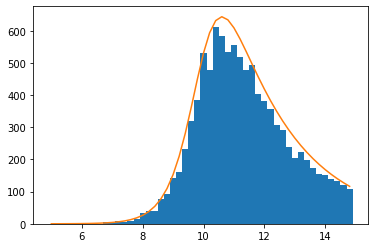

In [70]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
delta=0.2
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins, patches = ax.hist(np.log10(tlefts), bins=np.linspace(np.log10(Lmin)-delta/2,np.log10(Lmax)-delta/2,int(span/delta+1)))

centers = (bins+delta/2)[:-1]
mid = int(len(bins)/2)
ax.plot(centers, 2*counts[mid]*(10**centers/1e10)**(-(alpha-1))/(1+10**centers/1e10))

In [35]:
int(span/delta+1)

1001

In [25]:
counts[mid]

114.0

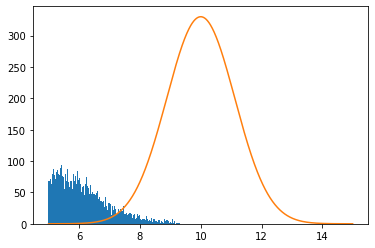

In [28]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
delta=0.01
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins, patches = ax.hist(np.log10(tinst), bins=np.linspace(np.log10(Lmin)-delta/2,np.log10(Lmax)-delta/2,int(span/delta+1)))

centers = (bins+delta/2)[:-1]

ax.plot(centers, 330*np.exp(-(centers-10)**2/2.5))
mid = int(len(bins)/2)
#ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
#ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


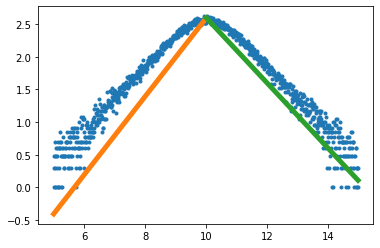

In [35]:
delta = bins[1]-bins[0]
centers = (bins+delta/2)[:-1]
mid = int(len(bins)/2)+1

fig, ax = plt.subplots()
ax.plot(centers, np.log10(counts), '.')
ax.plot(centers[:mid], (np.log10(counts[mid])+0.6*(centers-centers[mid]))[:mid],lw=5)
ax.plot(centers[mid:], (np.log10(counts[mid])-0.5*(centers-centers[mid]))[mid:], lw=5)

In [94]:
centers[mid]

10.0

In [95]:
counts[mid-1]

642.0

In [91]:
counts[mid+1]

756.0

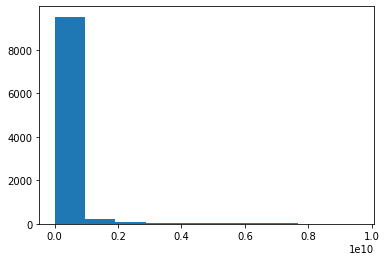

In [17]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
delta=0.1
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins, patches = ax.hist(tinst)

centers = (bins+delta/2)[:-1]

mid = int(len(bins)/2)
#ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
#ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

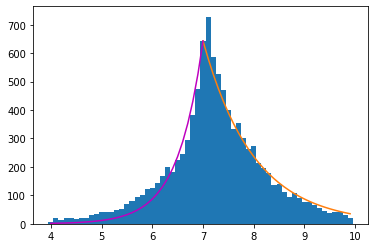

In [16]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
delta=0.1
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins, patches = ax.hist(np.log10(tinst), bins=np.linspace(np.log10(Lmin)-delta/2,np.log10(Lmax)-delta/2,int(span/delta+1)))

centers = (bins+delta/2)[:-1]

mid = int(len(bins)/2)
ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

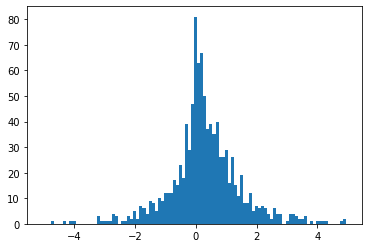

In [9]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
delta=0.1
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins, patches = ax.hist(np.log10(tinst)-np.log10(age), bins=np.linspace(np.log10(Lmin)-np.log10(age)-delta/2,np.log10(Lmax)-np.log10(age)-delta/2,int(span/delta+1)))

centers = (bins+delta/2)[:-1]

mid = int(len(bins)/2)
#ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
#ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

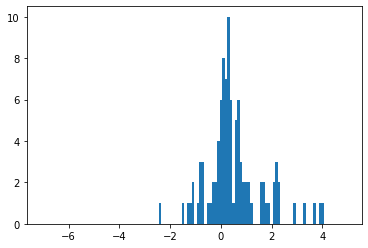

In [11]:
# assumes Lmin and Lmax symmetric around age
fig, ax = plt.subplots()
delta=0.1
span = np.log10(Lmax)-np.log10(Lmin) 
counts, bins, patches = ax.hist(np.log10(tinst)-np.log10(age), bins=np.linspace(np.log10(Lmin)-np.log10(age)-delta/2,np.log10(Lmax)-np.log10(age)-delta/2,int(span/delta+1)))

centers = (bins+delta/2)[:-1]

mid = int(len(bins)/2)
#ax.plot(centers[int(len(bins)/2):], counts[int(len(bins)/2)]*np.exp(-(centers-centers[int(len(bins)/2)]))[int(len(bins)/2):])
#ax.plot(centers[:int(len(bins)/2)+1], counts[int(len(bins)/2)]*np.exp(-2*(centers[int(len(bins)/2)]-centers))[:int(len(bins)/2)+1], c='m')

In [24]:
from scipy.integrate import quad

In [37]:
def pl(L,  B):
    if L < 1:
        return B*np.exp(np.log10(L))
    else:
        return B*np.exp(-1*np.log10(L))

def pl2(logL):
    if logL < 0:
        return 2/3*np.exp(logL)
    else:
        return 2/3*np.exp(-2*logL)

In [38]:
quad(pl2, -5, 15)

(0.9955080353339117, 2.2892798767770728e-12)

In [39]:
1/np.log(10)

0.43429448190325176

In [40]:
np.log(10)

2.302585092994046

In [41]:
1/np.log10(np.exp(1))

2.302585092994046

In [42]:
np.log(7)

1.9459101490553132

In [43]:
np.log10(7)/np.log10(np.exp(1))

1.9459101490553132